# Exploratory data analysis

## Importing Libraries


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()  # Upload your files again


Saving store.csv to store (3).csv
Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [6]:
# List the uploaded files
print(uploaded.keys())  # This will show the names of uploaded files


dict_keys(['store (3).csv', 'test (3).csv', 'train (3).csv'])


In [7]:
import pandas as pd

# Assuming the uploaded file names are 'store.csv', 'train.csv', and 'test.csv'
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display the first few rows of the data
print(store.head())
print(train.head())
print(test.head())


   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [8]:
train.shape
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
train.shape

(1017209, 9)

## Verify Missing Values Have Been Handled

In [10]:
train.isnull().sum()


,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [11]:
# Check for missing values and print a message if null values are found
null_counts = test.isnull().sum()

for column, count in null_counts.items():
    if count > 0:
        print(f"Column '{column}' has {count} null value(s).")



Column 'Open' has 11 null value(s).


In [12]:
null_counts=store.isnull().sum()
for column, count in null_counts.items():
    if count > 0:
        print(f"Column '{column}' has {count} null value(s).")

Column 'CompetitionDistance' has 3 null value(s).
Column 'CompetitionOpenSinceMonth' has 354 null value(s).
Column 'CompetitionOpenSinceYear' has 354 null value(s).
Column 'Promo2SinceWeek' has 544 null value(s).
Column 'Promo2SinceYear' has 544 null value(s).
Column 'PromoInterval' has 544 null value(s).


## Handle Missing Values

In [13]:
# Fill missing 'Open' values in df_test with 1 (assuming store was open)
test['Open'] = test['Open'].fillna(1)

In [14]:
# Fill missing 'CompetitionDistance' with the median value
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())

# Fill missing 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with 0
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(0)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(0)

# Fill missing 'Promo2SinceWeek' and 'Promo2SinceYear' with 0
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)

# Fill missing 'PromoInterval' with 'No Promo'
store['PromoInterval'] = store['PromoInterval'].fillna('No Promo')

## Verify Missing Values Have Been Handled

In [15]:
train.duplicated().sum()

0

In [16]:
test.duplicated().sum()

0

In [17]:
store.duplicated().sum()

0

## Statistical Information

In [18]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [19]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854361,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352748,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [20]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Combining train and test data with store data

In [21]:
train = pd.merge(train, store, how = 'left', on = 'Store')
test = pd.merge(test, store, how = 'left', on = 'Store')

## Feature Extraction

In [22]:
# Correct way to display columns in the 'store' DataFrame
train.columns


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [23]:
train['year'] = pd.to_datetime(train['Date'], errors='coerce').dt.year
train[['Date','year']][:5]

,Date,year
0,2015-07-31,2015
1,2015-07-31,2015
2,2015-07-31,2015
3,2015-07-31,2015
4,2015-07-31,2015


In [24]:
train['month'] = pd.to_datetime(train['Date'], errors='coerce').dt.month
train[['Date','month']][:5]

,Date,month
0,2015-07-31,7
1,2015-07-31,7
2,2015-07-31,7
3,2015-07-31,7
4,2015-07-31,7


In [25]:
train['day'] = pd.to_datetime(train['Date'], errors='coerce').dt.day
train[['Date','day']][:5]

,Date,day
0,2015-07-31,31
1,2015-07-31,31
2,2015-07-31,31
3,2015-07-31,31
4,2015-07-31,31


In [26]:
train['weekday'] =pd.to_datetime(train['Date'],errors='coerce').dt.strftime('%A')
train[['Date','weekday']].sample(5)

,Date,weekday
986038,2013-01-28,Monday
894634,2013-04-20,Saturday
345192,2014-09-06,Saturday
2346,2015-07-29,Wednesday
752312,2013-08-26,Monday


# Exloratory Data Analysis

## How many open or closed stores are in the data?

In [27]:
# Count how many stores are open and closed
open_closed_counts = train['Open'].value_counts()

# Display the result
print("Number of open stores:", open_closed_counts.get(1, 0))
print("Number of closed stores:", open_closed_counts.get(0, 0))


Number of open stores: 844392
Number of closed stores: 172817


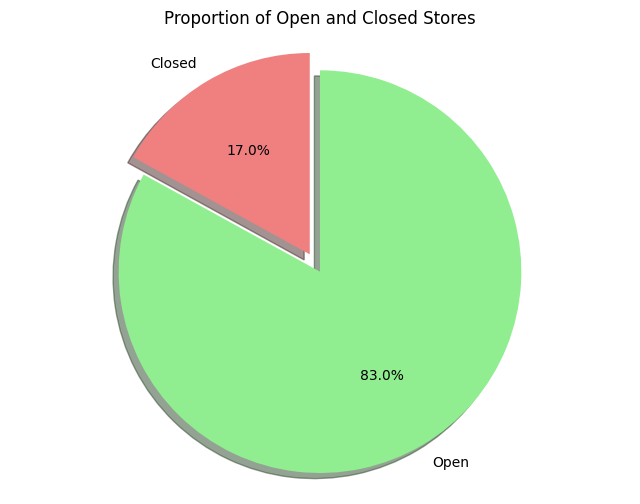

Number of open stores: 844392
Number of closed stores: 172817


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Count how many stores are open and closed
open_closed_counts = train['Open'].value_counts()

# Prepare data for the pie chart
labels = ['Closed', 'Open']
sizes = [open_closed_counts.get(0, 0), open_closed_counts.get(1, 0)]
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)  # Explode the 1st slice (Open)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Proportion of Open and Closed Stores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Display the result in the console
print("Number of open stores:", open_closed_counts.get(1, 0))
print("Number of closed stores:", open_closed_counts.get(0, 0))


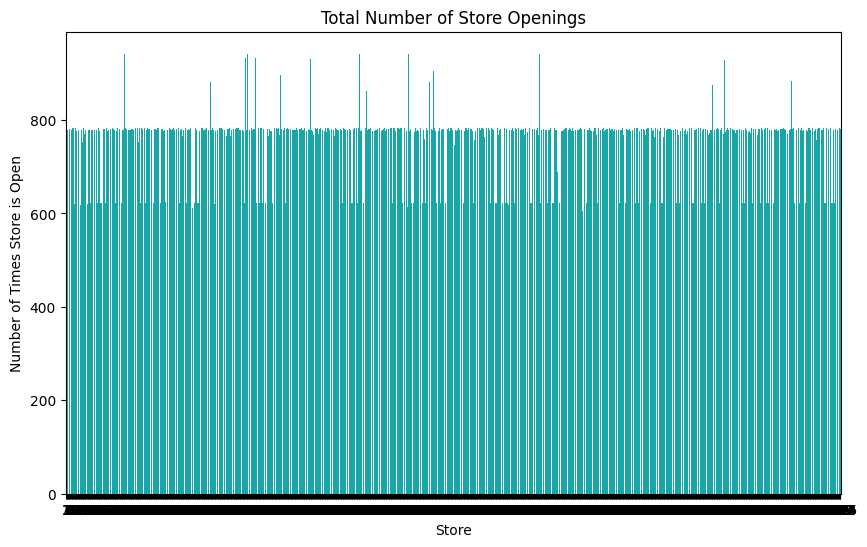

In [28]:
# Aggregate by store to count how many times each store is open or closed
x = train.groupby('Store')['Open'].sum().reset_index()  # Sum of 'Open' indicates how often a store is open

# Define labels for the plot (open or closed)
labels = ['Open', 'Closed']

# Plot the total number of open and closed stores
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# Plot using seaborn
sns.barplot(x='Store', y='Open', data=x, color='c')  # Correct usage of sns.barplot with keyword arguments
plt.xlabel('Store')
plt.ylabel('Number of Times Store is Open')
plt.title('Total Number of Store Openings')

plt.show()


## Promotion Impact on Sales:

Promo
0    629129
1    388080
Name: count, dtype: int64


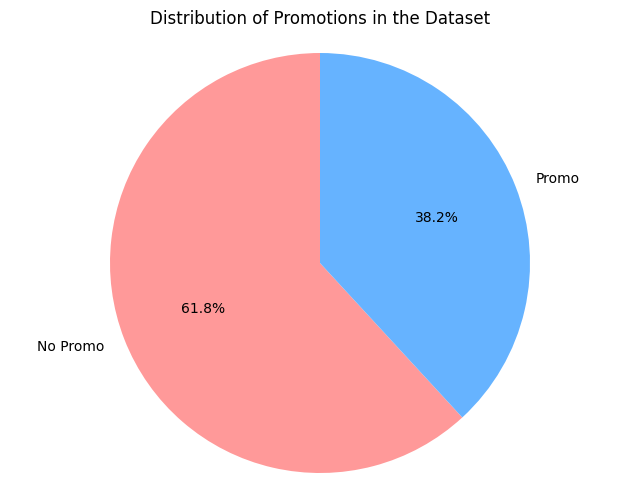

In [56]:
# Check for unique values and their counts in 'Promo' column first
promo_counts = train['Promo'].value_counts()

# Display the counts directly
print(promo_counts)

# Visualize the count of promotions using a pie chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create the pie chart
ax.pie(promo_counts, labels=['No Promo', 'Promo'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Promotions in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


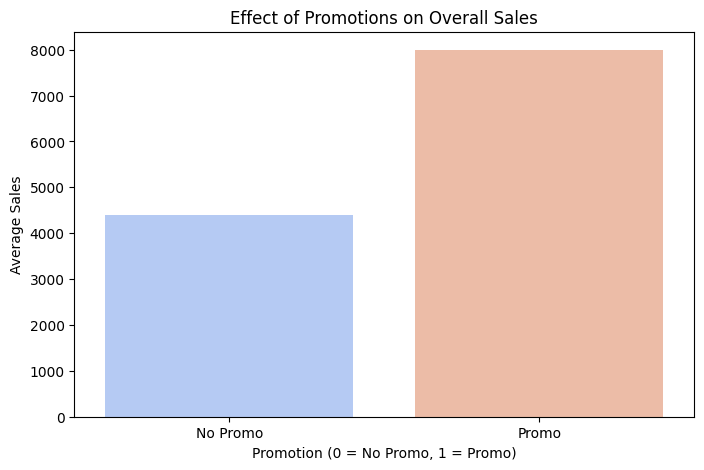

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average sales based on promotions
promo_sales = train.groupby('Promo')['Sales'].mean()

# Plotting the effect of promotions on sales
plt.figure(figsize=(8, 5))
sns.barplot(x=promo_sales.index, y=promo_sales.values, palette='coolwarm')
plt.title('Effect of Promotions on Overall Sales')
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'])  # Set custom labels for clarity
plt.show()


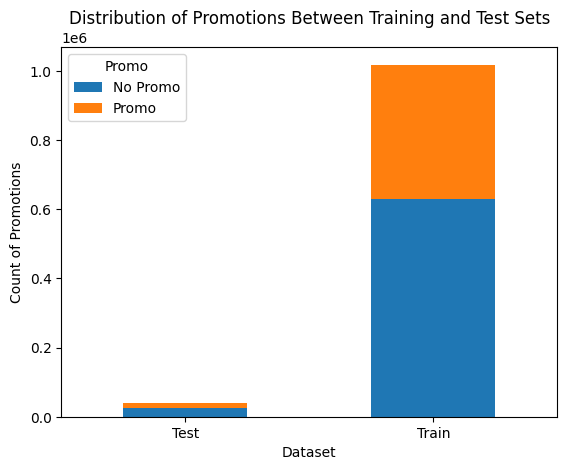

In [34]:
import pandas as pd

# Assuming you already have 'train' and 'test' DataFrames
train['Set'] = 'Train'  # Add a column to indicate the training set
test['Set'] = 'Test'    # Add a column to indicate the test set

# Combine the datasets for analysis
combined_data = pd.concat([train, test], ignore_index=True)

# Now you can group by 'Set' and 'Promo'
promo_dist = combined_data.groupby(['Set', 'Promo']).size().unstack().reset_index()

# Plotting the distribution of promotions between training and test sets
promo_dist.plot(kind='bar', x='Set', stacked=True)
plt.title('Distribution of Promotions Between Training and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Count of Promotions')
plt.xticks(rotation=0)
plt.legend(title='Promo', labels=['No Promo', 'Promo'])
plt.show()


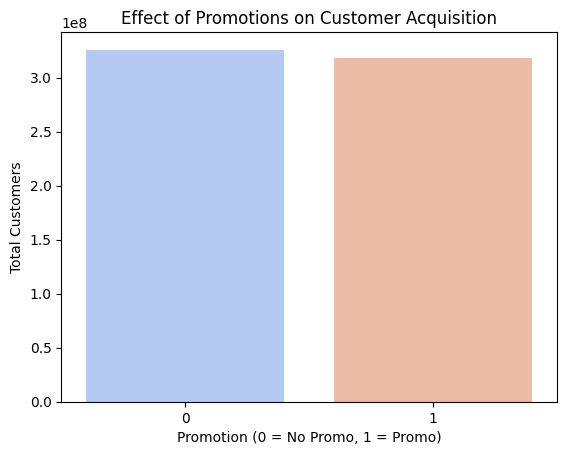

Total customers during promo: 318263948
Total customers without promo: 325777807


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by 'Promo' and summing the number of customers
promo_customers = train.groupby('Promo')['Customers'].sum().reset_index()

# Plotting the total customers for promo and no promo
sns.barplot(x='Promo', y='Customers', data=promo_customers, palette='coolwarm')
plt.title('Effect of Promotions on Customer Acquisition')
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)')
plt.ylabel('Total Customers')
plt.show()

# Analyzing the number of unique customers (if there's a way to track unique visits)
unique_customers_promo = train[train['Promo'] == 1]['Customers'].sum()  # Total customers during promo
unique_customers_no_promo = train[train['Promo'] == 0]['Customers'].sum()  # Total customers without promo

print(f"Total customers during promo: {unique_customers_promo}")
print(f"Total customers without promo: {unique_customers_no_promo}")


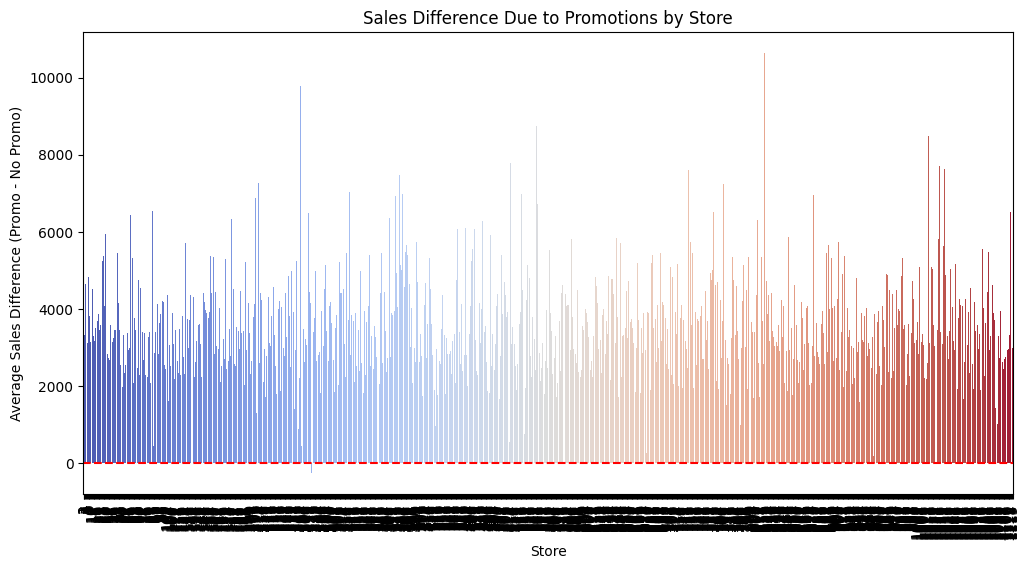

Promo  Store             0             1  Sales_Difference
816      817  14043.338488  24679.566667      10636.228179
260      261   6694.369416  16478.113889       9783.744473
543      544   8329.314433  17072.355556       8743.041123
1013    1014   6853.450172  15334.427778       8480.977606
962      963   5758.707904  13982.883333       8224.175430
...      ...           ...           ...               ...
261      262  20549.637457  20991.536111        441.898654
675      676   7387.360825   7660.133333        272.772509
352      353   5483.197595   5734.866667        251.669072
947      948   6759.482818   6953.597222        194.114404
273      274   4124.945017   3870.261111       -254.683906

[1115 rows x 4 columns]


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping by Store and Promo to find average sales
store_promo_sales = train.groupby(['Store', 'Promo'])['Sales'].mean().reset_index()

# Pivoting the data for better analysis
store_sales_pivot = store_promo_sales.pivot(index='Store', columns='Promo', values='Sales').reset_index()

# Calculate the sales difference
store_sales_pivot['Sales_Difference'] = store_sales_pivot[1] - store_sales_pivot[0]

# Sorting stores by sales difference
store_sales_pivot = store_sales_pivot.sort_values(by='Sales_Difference', ascending=False)

# Plotting the effect of promotions on sales for each store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Sales_Difference', data=store_sales_pivot, palette='coolwarm')
plt.title('Sales Difference Due to Promotions by Store')
plt.xlabel('Store')
plt.ylabel('Average Sales Difference (Promo - No Promo)')
plt.xticks(rotation=90)
plt.axhline(0, color='red', linestyle='--')  # Line at zero for reference
plt.show()

# Display the store sales data with differences
print(store_sales_pivot[['Store', 0, 1, 'Sales_Difference']])


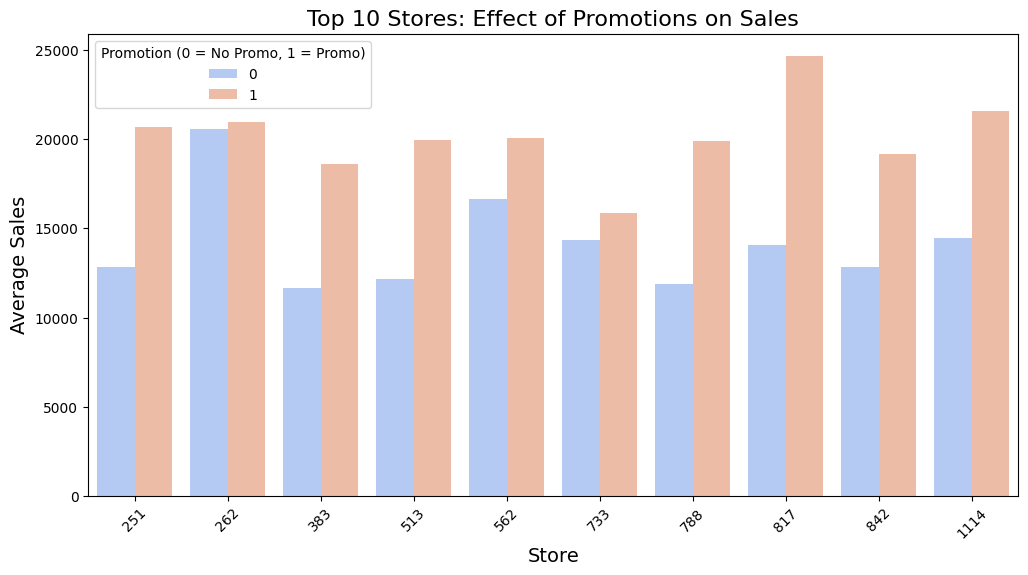

In [44]:
# Sort and limit to top N stores based on promo sales
top_n = 10
top_stores = store_promo_sales.groupby('Store')['Sales'].mean().nlargest(top_n).index
filtered_sales = store_promo_sales[store_promo_sales['Store'].isin(top_stores)]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Sales', hue='Promo', data=filtered_sales, palette='coolwarm')
plt.title('Top 10 Stores: Effect of Promotions on Sales', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Promotion (0 = No Promo, 1 = Promo)')
plt.show()


## Customer Behavior Patterns:

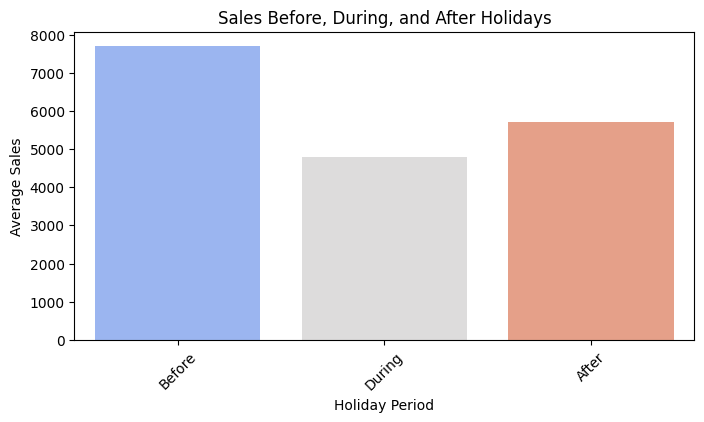

  Holiday_Period        Sales
0         Before  7693.283252
1         During  4787.403377
2          After  5700.274852


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime for holiday analysis
train['Date'] = pd.to_datetime(train['Date'])

# Define a holiday indicator for Christmas and Easter
train['Holiday'] = train['Date'].apply(
    lambda x: 1 if (x.month == 12 and x.day == 25) or (x.month == 4 and (x.day >= 1 and x.day <= 7)) else 0
)

# Define a new column for holiday periods (1 = Before, 2 = During, 3 = After)
train['Holiday_Period'] = train['Date'].apply(
    lambda x: 1 if (x.month == 12 and x.day < 25) or (x.month == 4 and x.day < 1) else
               (2 if (x.month == 12 and x.day == 25) or (x.month == 4 and (x.day >= 1 and x.day <= 7)) else 3)
)

# Group by holiday period and calculate average sales
holiday_sales = train.groupby('Holiday_Period')['Sales'].mean().reset_index()

# Map periods to labels for better readability
holiday_sales['Holiday_Period'] = holiday_sales['Holiday_Period'].map({1: 'Before', 2: 'During', 3: 'After'})

# Visualizing sales before, during, and after holidays
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x='Holiday_Period', y='Sales', data=holiday_sales, palette='coolwarm', ax=ax)
plt.title('Sales Before, During, and After Holidays')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

# Display the average sales values
print(holiday_sales)



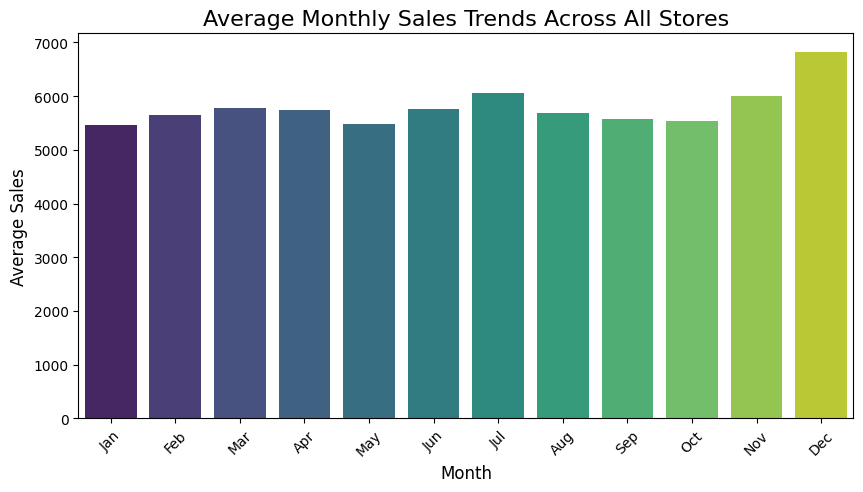

In [46]:
# Add a 'Month' column to analyze seasonal trends
train['Month'] = train['Date'].dt.month

# Grouping by Month to calculate average sales across all stores for each month
seasonal_sales = train.groupby('Month')['Sales'].mean().reset_index()

# Visualizing seasonal trends across all stores
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Sales', data=seasonal_sales, palette='viridis')
plt.title('Average Monthly Sales Trends Across All Stores', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


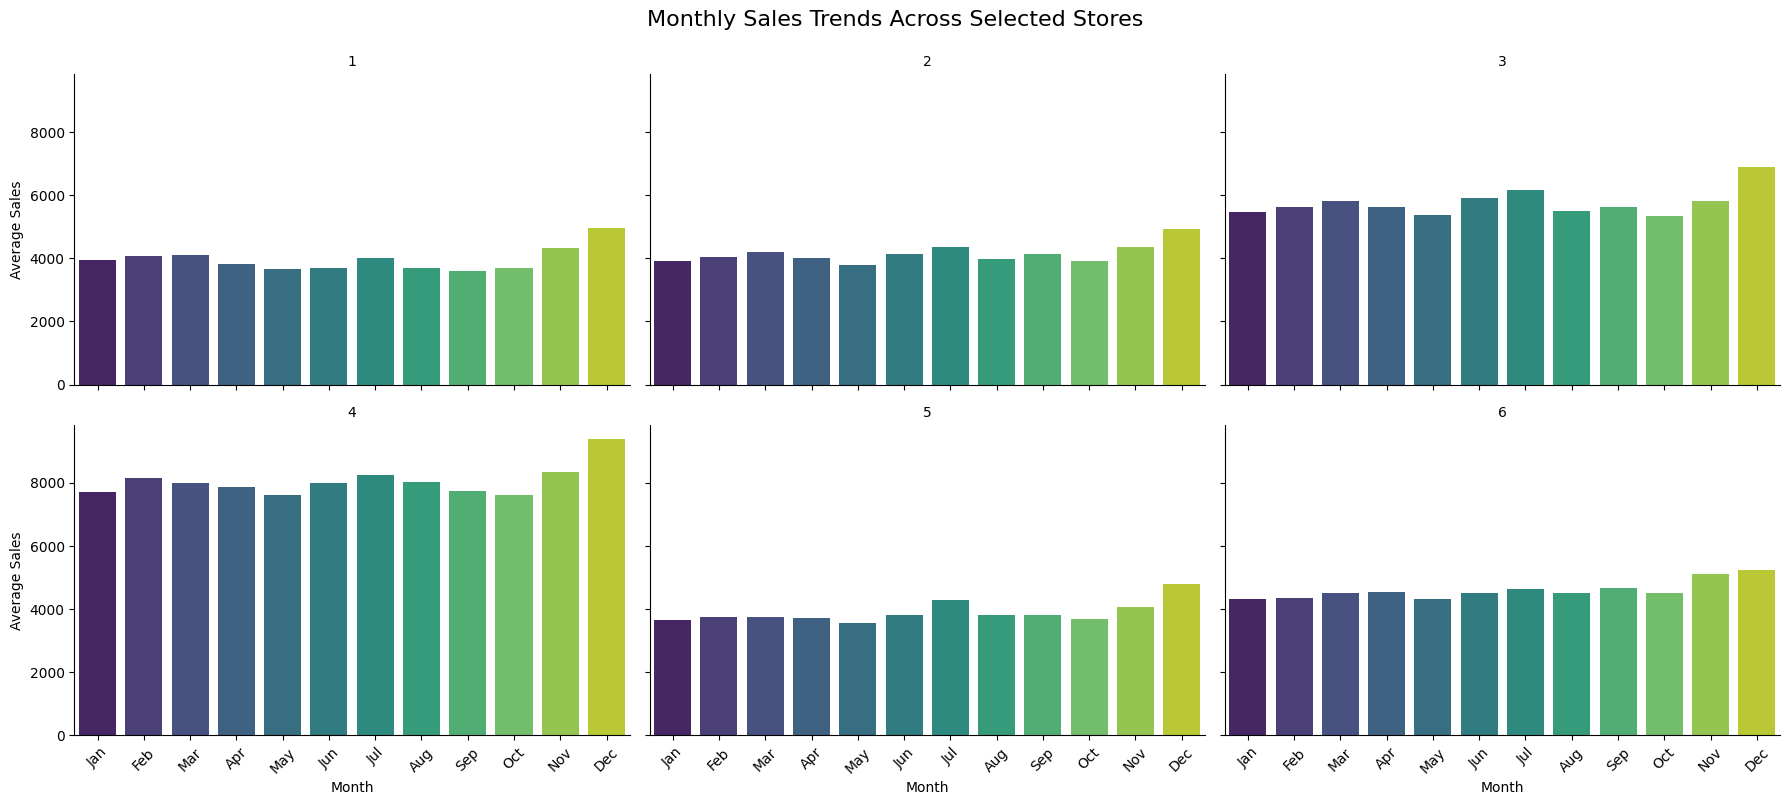

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a 'Month' column to analyze seasonal trends
train['Month'] = train['Date'].dt.month

# Grouping by Store and Month to calculate average sales
seasonal_sales = train.groupby(['Store', 'Month'])['Sales'].mean().reset_index()

# Limit to a smaller number of stores for better readability
# You can choose the first 6 stores or any other subset you prefer
top_stores = seasonal_sales['Store'].unique()[:6]  # Adjust the number as needed
seasonal_sales_subset = seasonal_sales[seasonal_sales['Store'].isin(top_stores)]

# Create a facet grid to visualize seasonal trends for each store
g = sns.FacetGrid(seasonal_sales_subset, col='Store', col_wrap=3, height=4, aspect=1.5)
g.map(sns.barplot, 'Month', 'Sales', palette='viridis')

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Average Sales")
g.set_xticklabels(labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Sales Trends Across Selected Stores', fontsize=16)
plt.show()


Correlation between Customers and Sales:
           Customers     Sales
Customers   1.000000  0.894711
Sales       0.894711  1.000000


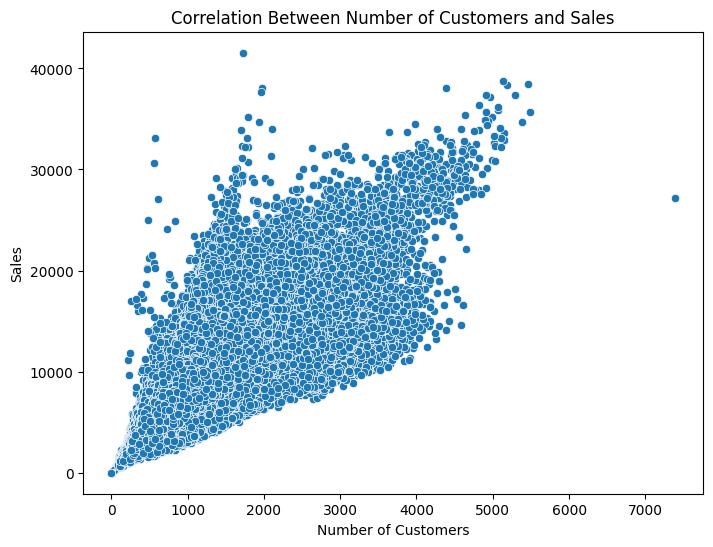

In [49]:
# 3. How does the number of customers relate to the total sales?
# Calculate correlation between the number of customers and total sales
correlation = train[['Customers', 'Sales']].corr()

# Print the correlation
print("Correlation between Customers and Sales:")
print(correlation)

# Visualize the relationship between number of customers and sales
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='Customers', y='Sales', data=train, ax=ax)
plt.title('Correlation Between Number of Customers and Sales')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


## Store-Specific Analysis and Competitor Influence

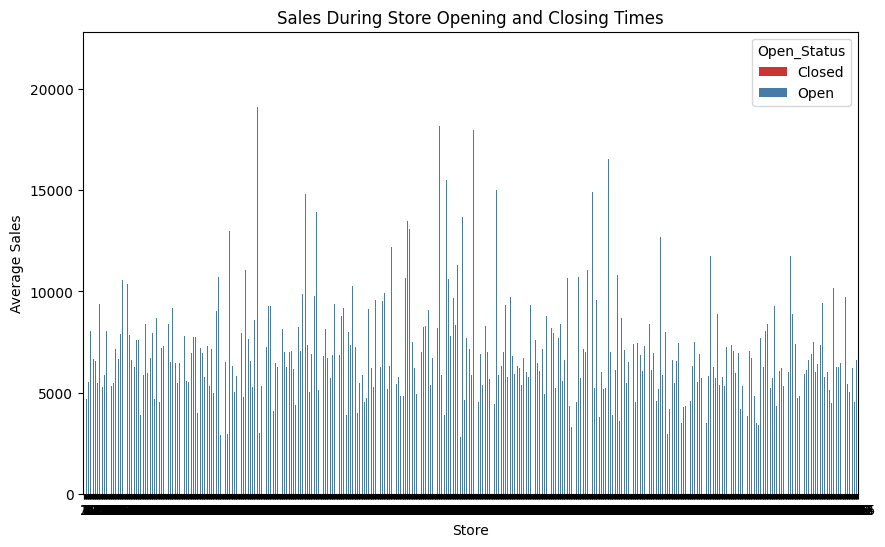

In [50]:
# 1. Trends in Customer Behavior During Store Opening and Closing Times
# Convert 'Open' column (if 1 = open, 0 = closed) to a string label for better visualization
train['Open_Status'] = train['Open'].map({1: 'Open', 0: 'Closed'})

# Group by Store and Open_Status to calculate average sales
store_open_sales = train.groupby(['Store', 'Open_Status'])['Sales'].mean().reset_index()

# Visualizing sales when stores are open vs closed
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Store', y='Sales', hue='Open_Status', data=store_open_sales, palette='Set1', ax=ax)
plt.title('Sales During Store Opening and Closing Times')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.show()


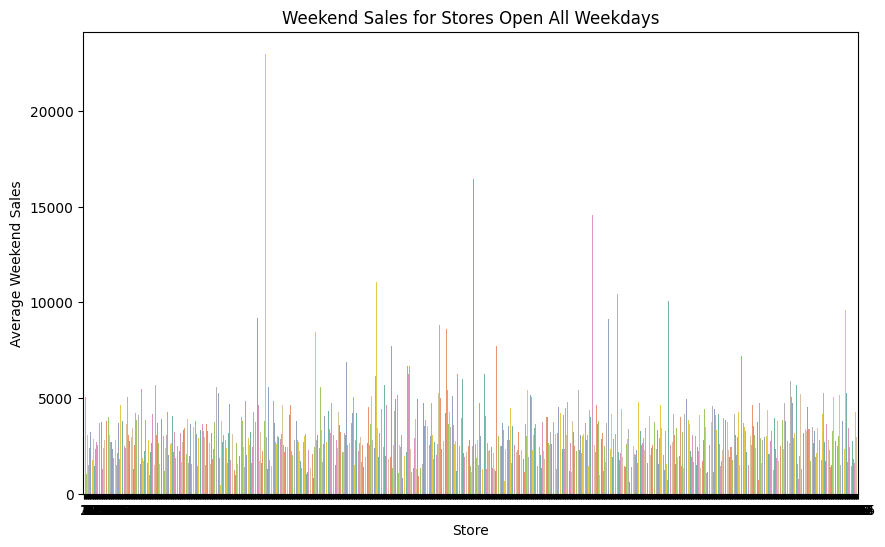

In [51]:
# 2. Significant Differences in Sales on Weekends for Stores Open All Weekdays
# Adding 'Day of Week' to dataset (0 = Monday, 6 = Sunday)
train['DayOfWeek'] = train['Date'].dt.dayofweek

# Identifying stores that are open all weekdays
weekday_open_stores = train.groupby('Store')['Open'].apply(lambda x: all(x[:5] == 1)).reset_index()
weekday_open_stores = weekday_open_stores[weekday_open_stores['Open'] == True]['Store']

# Filter out sales on weekends (Saturday=5, Sunday=6) for these stores
weekend_sales = train[(train['Store'].isin(weekday_open_stores)) & (train['DayOfWeek'] >= 5)]

# Calculate average sales for these stores on weekends
avg_weekend_sales = weekend_sales.groupby('Store')['Sales'].mean().reset_index()

# Visualizing weekend sales for stores that are open all weekdays
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Store', y='Sales', data=avg_weekend_sales, palette='Set2', ax=ax)
plt.title('Weekend Sales for Stores Open All Weekdays')
plt.xlabel('Store')
plt.ylabel('Average Weekend Sales')
plt.show()


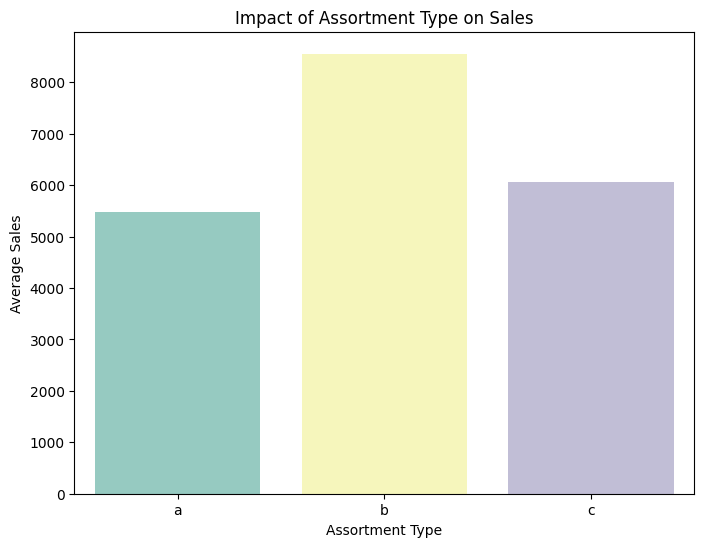

In [52]:
# 3. Does the Assortment Type of Products Influence Sales?
# Group by Assortment type and calculate average sales
assortment_sales = train.groupby('Assortment')['Sales'].mean().reset_index()

# Visualizing sales across different assortment types
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Assortment', y='Sales', data=assortment_sales, palette='Set3', ax=ax)
plt.title('Impact of Assortment Type on Sales')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.show()


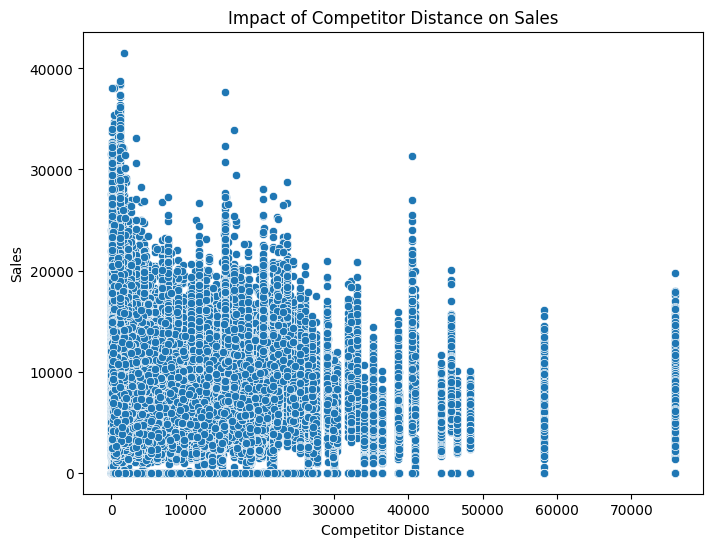

In [53]:
# Competitor Influence
#1. How Does the Distance to the Nearest Competitor Impact Sales?
# Visualizing the relationship between competitor distance and sales
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=train, ax=ax)
plt.title('Impact of Competitor Distance on Sales')
plt.xlabel('Competitor Distance')
plt.ylabel('Sales')
plt.show()


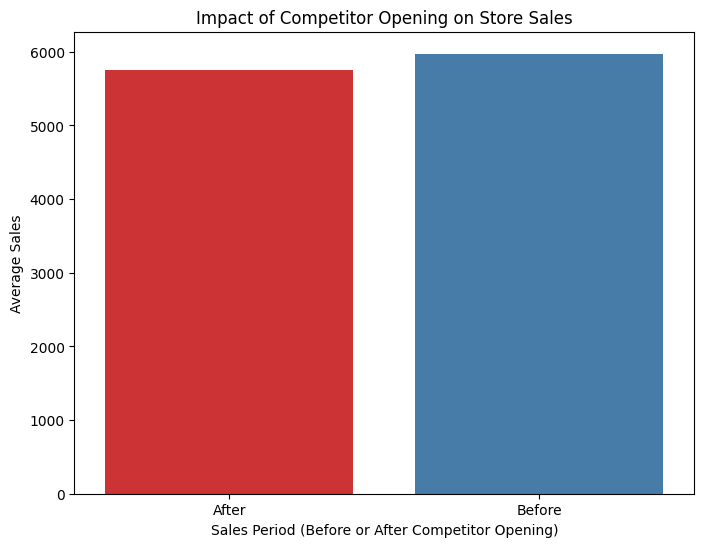

In [55]:
# 3. Impact of Competitor Opening or Reopening on Store Performance
# Filter stores with competitor distances that changed from NA to a value
# Assuming 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' indicate when a competitor opened
# Add a flag for competitor presence
train['CompetitorPresent'] = train['CompetitionDistance'].notnull().astype(int)

# Calculate sales before and after competitor opening by adding a new column for the period
# You might need to adjust this logic depending on your dataset and how you want to define "before" and "after"
train['SalesPeriod'] = train.apply(
    lambda x: 'Before' if (x['Date'].year < x['CompetitionOpenSinceYear']) or
                 (x['Date'].year == x['CompetitionOpenSinceYear'] and x['Date'].month < x['CompetitionOpenSinceMonth'])
                 else 'After' if (x['CompetitorPresent'] == 1) else 'No Competitor',
    axis=1
)

# Grouping by SalesPeriod and calculating average sales for each
competitor_sales_change = train[train['CompetitorPresent'] == 1].groupby(['SalesPeriod'])['Sales'].mean().reset_index()

# Visualizing the impact of competitor reopening on sales
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='SalesPeriod', y='Sales', data=competitor_sales_change, palette='Set1', ax=ax)
plt.title('Impact of Competitor Opening on Store Sales')
plt.xlabel('Sales Period (Before or After Competitor Opening)')
plt.ylabel('Average Sales')
plt.show()



In [ ]:
#